<a href="https://colab.research.google.com/github/Mauricio235/Sprint-4/blob/main/final_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lendo o banco de dados 

In [45]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
!pip install google.colab

In [2]:
conn = psycopg2.connect(dbname='postgres',user='admin',
                        host='ec2-3-19-72-177.us-east-2.compute.amazonaws.com', password='admin',
                        port= '5432')


In [3]:
banco_response = "select * from response;"

In [4]:
banco_response_csv = pd.read_sql_query(banco_response, conn)
banco_response_csv.head(10)

,response_id,full_address_response,street,number_,district,city,state,country,accuracy,zip_code,latitude,longitude,geoapi_id,request_id
0,667,"Rua Odylla Ramos Chika, Lomba Do Pinheiro, Por...",Rua Odylla Ramos Chika,None,None,None,None,None,0.703704,None,-30.126539,-51.102908,3,5
1,668,"Rua Odylla Ramos Chika, 91790, Porto Alegre",Rua Odylla Ramos Chika,None,Lomba do Pinheiro,Porto Alegre,Rio Grande do Sul,Brasil,13.065763,None,-30.12651,-51.10296,8,5
2,669,"Rua Odylla Ramos Chika, 36, Lomba do Pinheiro,...",Rua Odylla Ramos Chika,36,Lomba do Pinheiro,Porto Alegre,Rio Grande do Sul,Brasil,1.000000,91560-830,-30.12641,-51.10365,2,5
3,670,"Rua Odylla Ramos Chika, Lomba do Pinheiro, Por...",Rua Odylla Ramos Chika,None,Lomba do Pinheiro,Porto Alegre,Rio Grande do Sul,Brasil,0.700000,91570-490,-30.126549,-51.1029468,10,5
4,671,"Rua Marta JÃÂºlia da ConceiÃÂ§ÃÂ£o, 2, Boeh...",Rua Marta JÃÂºlia da ConceiÃÂ§ÃÂ£o,2,Boehmerwaldt,Joinville,Santa Catarina,Brasil,0.490000,89235-508,-26.36434,-48.82864,2,6
5,672,"Rua Constantino Borges 876, JoÃÂ£o Costa, Joi...",Rua Constantino Borges,876,None,None,None,None,0.687831,None,-26.353611,-48.814074,3,7
6,673,"Rua Constantino Oliveira Borges, Joinville",Rua Constantino Oliveira Borges,None,None,Joinville,Santa Catarina,Brasil,8.504085,None,-26.35261,-48.8152,8,7
7,674,"Rua Constantino Oliveira Borges, 876, JoÃÂ£o ...",Rua Constantino Oliveira Borges,876,JoÃÂ£o Costa,Joinville,Santa Catarina,Brasil,0.850000,89209-500,-26.35361,-48.81445,2,7
8,675,"Rua Manoel Correia De Freitas 444, Jardim Soci...",Rua Manoel Correia De Freitas,444,None,None,None,None,0.759259,None,-25.417651,-49.238037,3,8
9,676,PraÃÂ§a Pres Eisenhower & Rua Manoel Correia ...,PraÃÂ§a Pres Eisenhower & Rua Manoel Correia ...,None,Jardim Social,Curitiba,ParanÃÂ¡,Brasil,12.633626,None,-25.41411,-49.23987,8,8


In [5]:
banco_request = "select * from request;"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
banco_request_csv = pd.read_sql_query(banco_request, conn)
banco_request_csv.head()

,request_id,full_address_request,street,number_,district,city,state,zip_code,unit
0,1,None,None,0,None,None,None,None,None
1,5286,"RUA COMENDADOR ARAUJO, 86, JOINVILLE, SC",RUA COMENDADOR ARAUJO,86,None,JOINVILLE,SC,89222-585,None
2,5288,"RUA I, 227, PORTO ALEGRE, RS",RUA I,227,None,PORTO ALEGRE,RS,91790-590,None
3,5291,"RUA CICLADES, 176 B, CASA 1 ANDAR 1, SÃO PAUL...",RUA CICLADES,176 B,None,SÃO PAULO,SP,00000-000,CASA 1 ANDAR 1
4,5,"RUA ODYLLA RAMOS CHIKA, 36, PORTO ALEGRE, RS",RUA ODYLLA RAMOS CHIKA,36,None,PORTO ALEGRE,RS,91570-000,None


In [ ]:
banco_geoapi = "select * from geoapi;"

In [8]:
cur= conn.cursor()
cur

<cursor object at 0x7fec0b6df650; closed: 0>

In [9]:

cur.execute('select * from response')

In [ ]:
resultado = cur.fetchall()

In [47]:

output4 = pd.merge(banco_request_csv, banco_response_csv, 
                   how = "outer", on= "request_id")

output4.head(10)
print(output4.shape)

(106294, 22)


In [54]:
output4.to_csv('output4.csv') 

In [55]:
from google.colab import files
import pandas as pd
output4.to_csv('output4.csv')
files.download('output4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Análise do dos dados


Medidas descritivas

In [12]:
print(output4.describe())  

          request_id    response_id       accuracy      geoapi_id
count  106294.000000  102193.000000  101582.000000  102193.000000
mean    27867.619903   51763.000000       1.833637       3.407699
std     17490.384465   29500.722367       3.316025       2.094758
min         1.000000     667.000000       0.211000       2.000000
25%     12432.250000   26215.000000       0.648148       2.000000
50%     27437.000000   51763.000000       0.730000       3.000000
75%     42700.000000   77311.000000       0.860000       3.000000
max     61278.000000  102859.000000      22.678957      10.000000


In [13]:
print(output4.groupby('city_x').mean()) 

                  request_id   response_id  accuracy  geoapi_id
city_x                                                         
CURITIBA        27241.144742  52314.931519  2.050180   3.425516
FLORIANÃPOLIS  30070.614352  50022.395847  0.662333   3.030867
JOINVILLE       26824.983392  51625.551621  2.011164   3.658518
PORTO ALEGRE    27417.036178  52632.541089  2.347898   3.451180
SÃO PAULO      30097.810641  50148.627713  0.703660   3.029192



#visualizando accuracy 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febf9be1c90>,
      dtype=object)

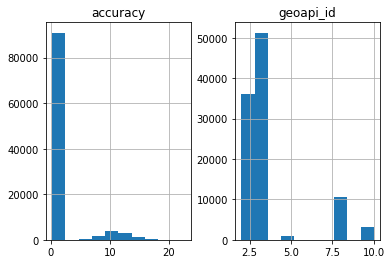

In [39]:
output4.loc[:,["accuracy", "geoapi_id"]].hist()
